In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Reading the Dataset into python

In [138]:
wine_data = pd.read_csv("Wine.csv")
wine_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [139]:
wine_data.shape

(178, 13)

In [140]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [141]:
wine_data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

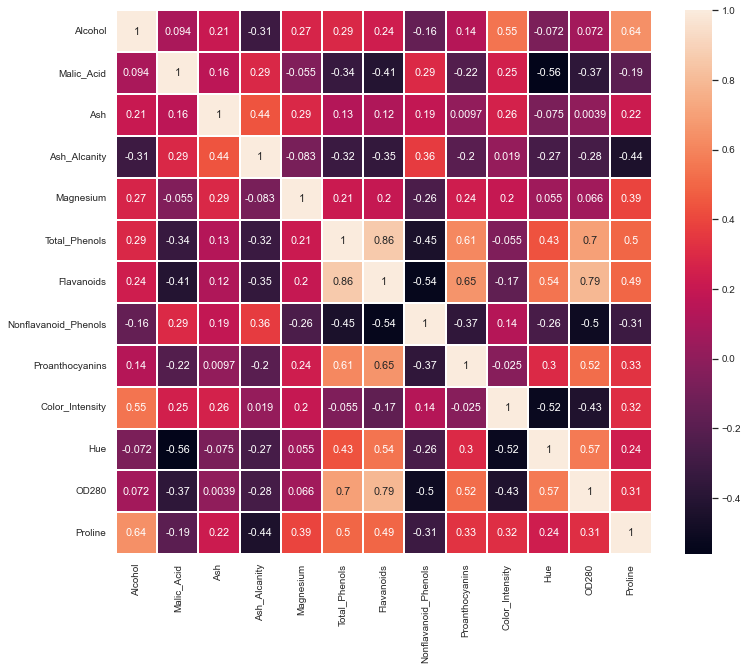

In [142]:
# Making a Correlation Matrix

corr = wine_data.corr()

plt.figure(figsize=(12,10))

sns.heatmap(corr, annot=True, linewidths=0.2);

In [143]:
###  Making the Boxplot of Original data set

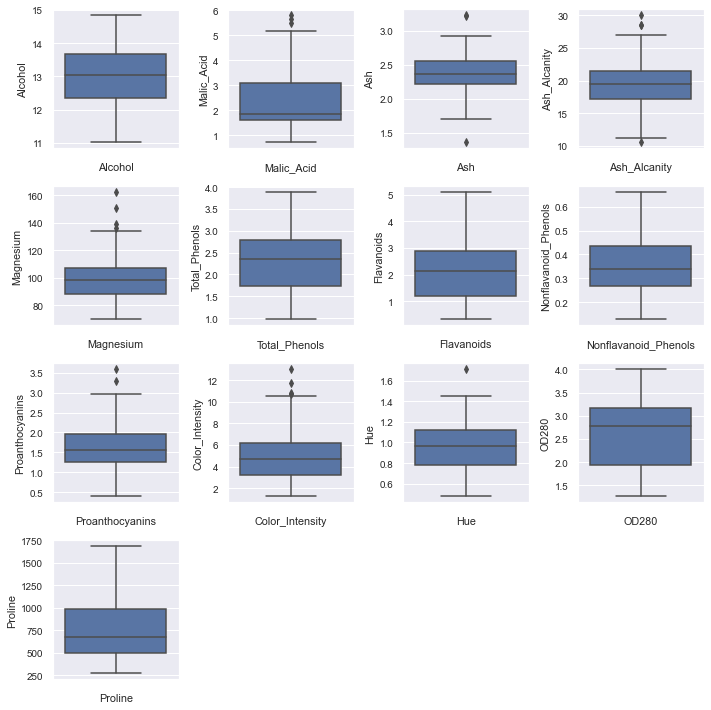

In [144]:
#plotting the columns for checking there any outliers in it
fig = plt.figure(figsize=(10,10))
for i in range(len(wine_data.columns)):
    fig.add_subplot(4,4,i+1)
    sns.boxplot(y=wine_data.iloc[:,i])
    plt.xlabel(wine_data.columns[i])
plt.tight_layout()
plt.show()

From the above plotting it is clear that the variables Malic acid, Ash, Alcalinity of Ash,Magnesium, Proanthocyanins,Color intensity and Hue have outliers


Creating a duplicate of the original dataset.

In [145]:
# Creating a dupicate file
duplic_wine = wine_data.copy()
duplic_wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [146]:
# function for removing outliers falling outside the normal range
def remove_outliers(duplic_wine, column):
  q3 = duplic_wine[column].quantile(0.75)
  q1 = duplic_wine[column].quantile(0.25)
  IQR = q3 - q1
  upper = q3 + (1.5 * IQR)
  lower = q1 - (1.5 * IQR)
  duplic_wine = duplic_wine[(duplic_wine[column] > lower ) & (duplic_wine[column] < upper)]
  return duplic_wine

In [147]:
# Remove the outlier values for "Magnesium", "Proanthocyanins" & "Color_Intensity"
duplic_wine = remove_outliers(duplic_wine,'Magnesium')
duplic_wine = remove_outliers(duplic_wine,'Proanthocyanins')
duplic_wine = remove_outliers(duplic_wine,'Color_Intensity')
duplic_wine = remove_outliers(duplic_wine,'Malic_Acid')
duplic_wine = remove_outliers(duplic_wine,'Ash')
duplic_wine = remove_outliers(duplic_wine,'Ash_Alcanity')
duplic_wine = remove_outliers(duplic_wine,'Hue')

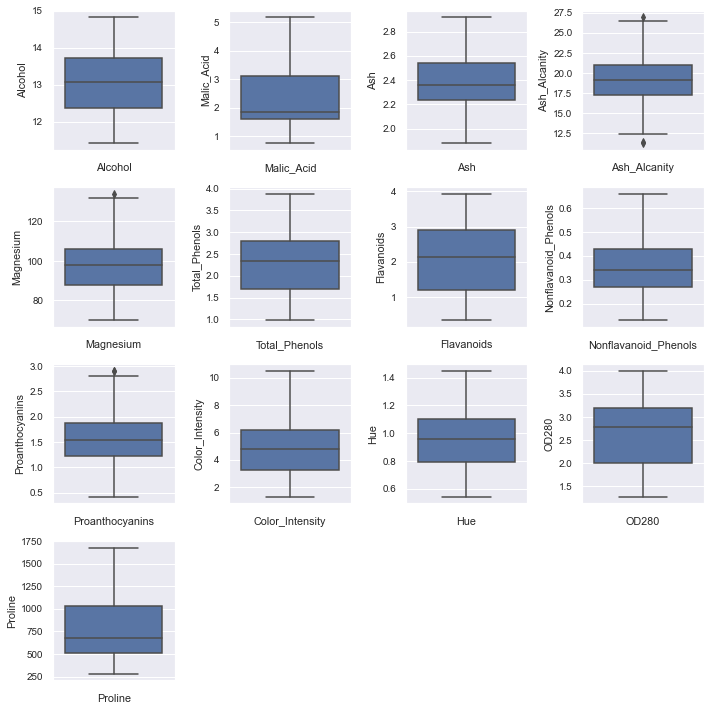

In [148]:
#plotting the columns for checking there any outliers in it
fig = plt.figure(figsize=(10,10))
for i in range(len(duplic_wine.columns)):
    fig.add_subplot(4,4,i+1)
    sns.boxplot(y=duplic_wine.iloc[:,i])
    plt.xlabel(duplic_wine.columns[i])
plt.tight_layout()
plt.show()

In [149]:
duplic_wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,157.00000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,13.03758,2.328280,2.375796,19.336943,98.732484,2.282102,2.025669,0.360573,1.535924,5.010064,0.953096,2.621783,758.382166
std,0.79713,1.049546,0.226133,2.962117,12.368478,0.632237,0.985583,0.122350,0.516785,2.130297,0.217322,0.715486,319.837469
min,11.41000,0.740000,1.880000,11.200000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.540000,1.270000,278.000000
25%,12.37000,1.610000,2.240000,17.200000,88.000000,1.700000,1.200000,0.270000,1.220000,3.250000,0.790000,2.000000,510.000000
50%,13.07000,1.860000,2.360000,19.100000,98.000000,2.350000,2.130000,0.340000,1.530000,4.800000,0.960000,2.780000,675.000000
75%,13.71000,3.100000,2.540000,21.000000,106.000000,2.800000,2.900000,0.430000,1.870000,6.200000,1.100000,3.190000,1035.000000
max,14.83000,5.190000,2.920000,27.000000,134.000000,3.880000,3.930000,0.660000,2.910000,10.520000,1.450000,4.000000,1680.000000


We can see that the scales are varying for different parameters, so we'll try standard scaling and normalizing our data first

In [150]:
# Creating 2 duplicates of the outlier removed data.

dup_stdscaled = wine_data.copy()



In [151]:
#### Standard scaling our dataset.

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled_data = ss.fit_transform(dup_stdscaled)



# 2.) Trying out different clustering models in the wine dataset. :

1.) Making a K-Means Model

Finding the Optimum number of Clusters

Using Elbow method to find the optimum clusters for both the dataset.

In [152]:
from sklearn.cluster import KMeans

# Using Scaled data

inertia = []
for k in range(1,10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_data)
    inertia.append(model.inertia_)
    
print(inertia)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2313.9999999999986, 1658.7588524290961, 1277.928488844643, 1175.5010017656325, 1113.1746796708967, 1041.1509898026466, 990.5628878782053, 947.5933136635618, 906.4225303136635]


Text(0, 0.5, 'Inertia')

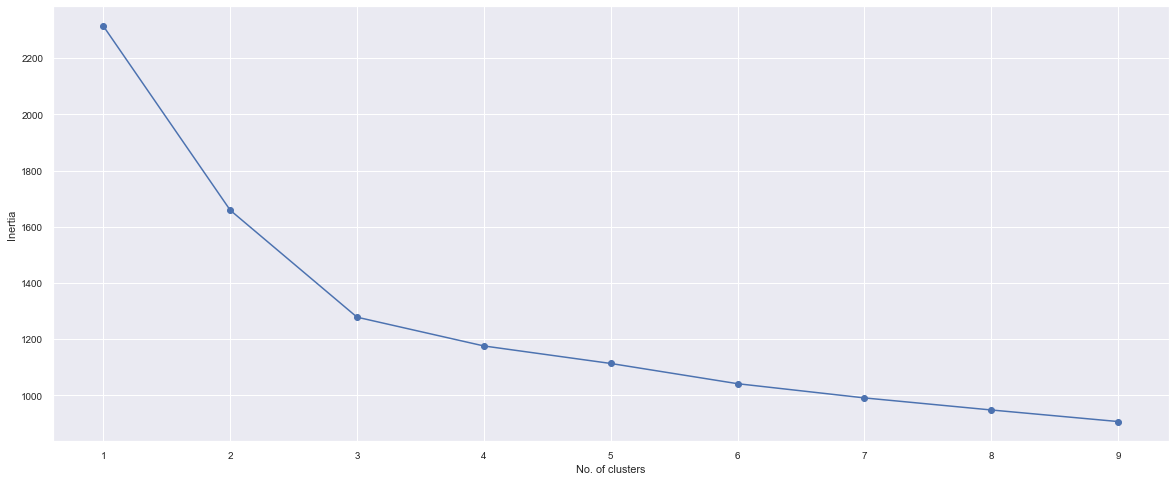

In [153]:
plt.plot(range(1,10),inertia,'-o')
plt.xlabel("No. of clusters")
plt.ylabel("Inertia")


We can take 3 or 4 as the optimum number for cluster for scaled data.

We can take 3 or 4 as the optimum cluster

Next we create a model based on the optimum clusters for both the datasets and choose the best one.

In [154]:
# Creating a model with 3 optimum clusters on scaled data

kmeans_s = KMeans(n_clusters=3)
kmeans_s.fit(scaled_data)
label_s = kmeans_s.predict(scaled_data)
print(label_s)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [155]:
# Creating a model with 4 optimum cluster on scaled data.

kmeans_s1 = KMeans(n_clusters=4)
kmeans_s1.fit(scaled_data)
label_s1 = kmeans_s1.predict(scaled_data)
print(label_s1)

[2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 3 1 3 3 1 1 3 1 3 1 3
 3 1 1 1 3 3 1 3 1 0 3 1 1 1 1 1 1 1 1 3 3 3 3 1 3 3 1 1 3 1 1 1 1 1 1 3 3
 1 1 1 1 1 1 1 1 1 3 3 3 3 3 1 3 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [156]:
from sklearn.metrics import silhouette_score
# Checking the silhouette_score of both models

print(f'Silhouette Score(n=3): {silhouette_score(scaled_data, label_s)}')

print(f'\nSilhouette Score(n=4): {silhouette_score(scaled_data, label_s1)}')

Silhouette Score(n=3): 0.2848589191898987

Silhouette Score(n=4): 0.2555818819212526


We observe that For n = 3 (scaled data) , we get a better silhouette_score on scaled data.

In [157]:
y_kmeans=pd.DataFrame(label_s)

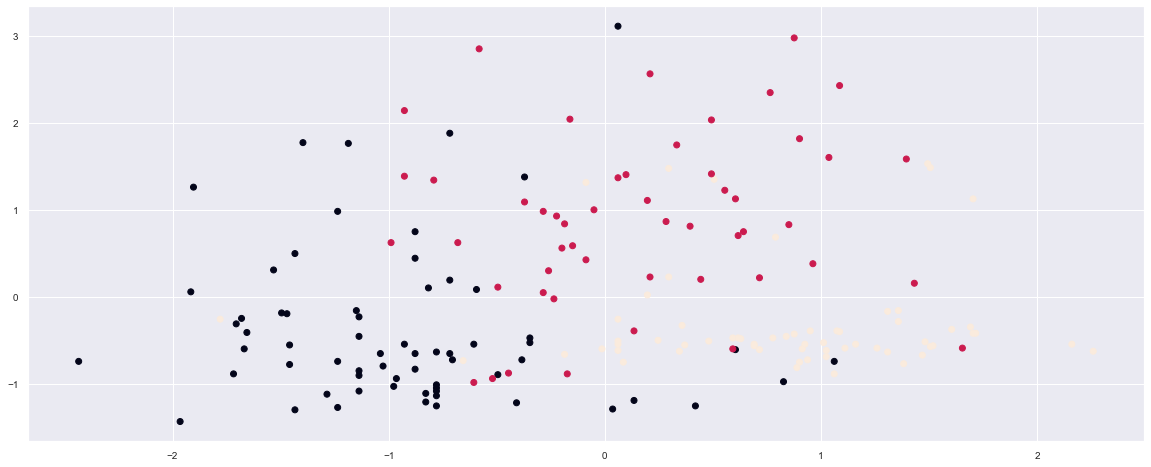

In [158]:
plt.scatter(scaled_data[:,0],scaled_data[:,1],c=y_kmeans)

Next performing PCA on the data to see if it can improve the performance.

In [159]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca.shape

(178, 2)

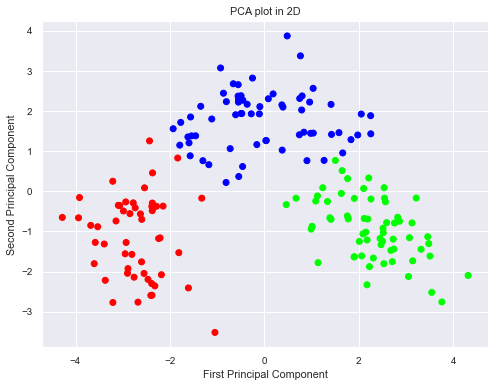

In [160]:
#PCA plot coloured by cluster

# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=label_s, cmap="brg")
plt.title('PCA plot in 2D')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [161]:
kmeans_pca_n = KMeans(n_clusters=3)
kmeans_pca_n.fit(x_pca)
label_pca_n = kmeans_pca_n.predict(x_pca)

print(label_pca_n)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [162]:
print(f'Silhouette Score(n=3): {silhouette_score(x_pca, label_pca_n)}')

Silhouette Score(n=3): 0.5610505693103246


# 2.) Creating a Agglomerative Hierarchical model (AHC)

Finding the optimum number of clusters.
first create a Dendrogram to find the optimum number of clusters.

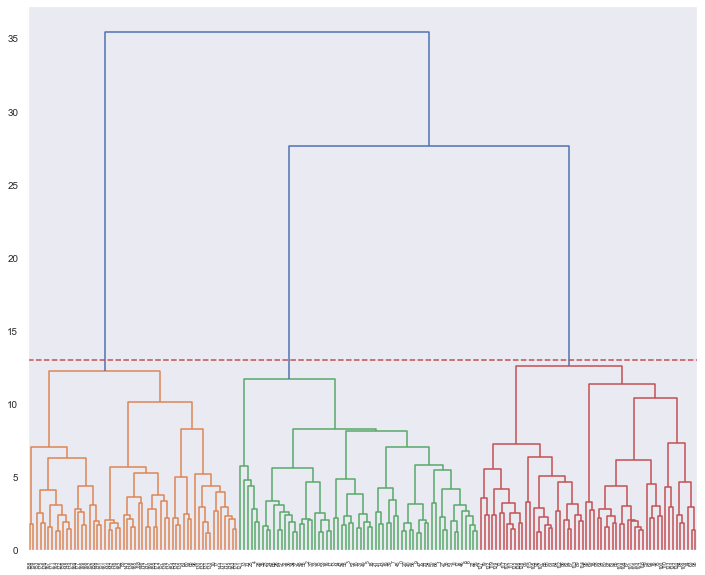

In [163]:
from scipy.cluster.hierarchy import dendrogram,linkage

# For scaled data

linked = linkage(scaled_data, method = "ward")

plt.figure(figsize=(12,10))
dendrogram(linked,orientation="top",distance_sort="ascending", show_leaf_counts=True)
plt.hlines(13,0,5000,colors="r",linestyles="dashed")
plt.grid()
plt.show();

From the above we can take 3 as the optimum number of clusters for the Scaled data.

Creating an AHC Model for Scaled data

In [164]:
from sklearn.cluster import AgglomerativeClustering

#  Making AHC Model for Scale data 

ahc_s = AgglomerativeClustering(n_clusters = 3, affinity="euclidean", linkage="ward")
y_ahc_s = ahc_s.fit_predict(scaled_data)

print(y_ahc_s)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 0 0 0 2 2 0 1 0 1 2 0 2
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [165]:
#Clusters
n_clusters = ahc_s.n_clusters_
print(n_clusters)

3


In [166]:
print(f'Silhouette Score(n=3): {silhouette_score(scaled_data, y_ahc_s)}')

Silhouette Score(n=3): 0.2774439826952265


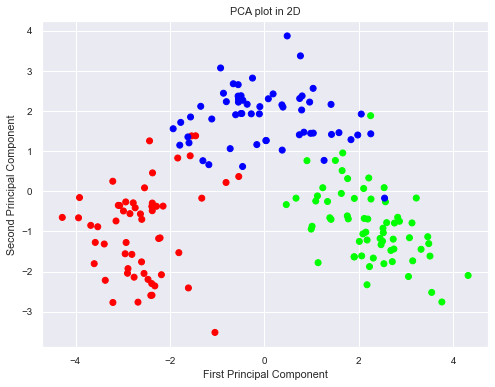

In [167]:
#PCA plot coloured by cluster

# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_ahc_s, cmap="brg")
plt.title('PCA plot in 2D')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [168]:
# Using the PCA to see if we are getting any improvement in performance
ahc_pca_n = AgglomerativeClustering(n_clusters = 3, affinity = "euclidean", linkage = "ward")
y_ahc_pca = ahc_pca_n.fit_predict(x_pca)

print(y_ahc_pca)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [169]:
print(f'Silhouette Score(n=2): {silhouette_score(x_pca, y_ahc_pca)}')

Silhouette Score(n=2): 0.5590883962040384


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


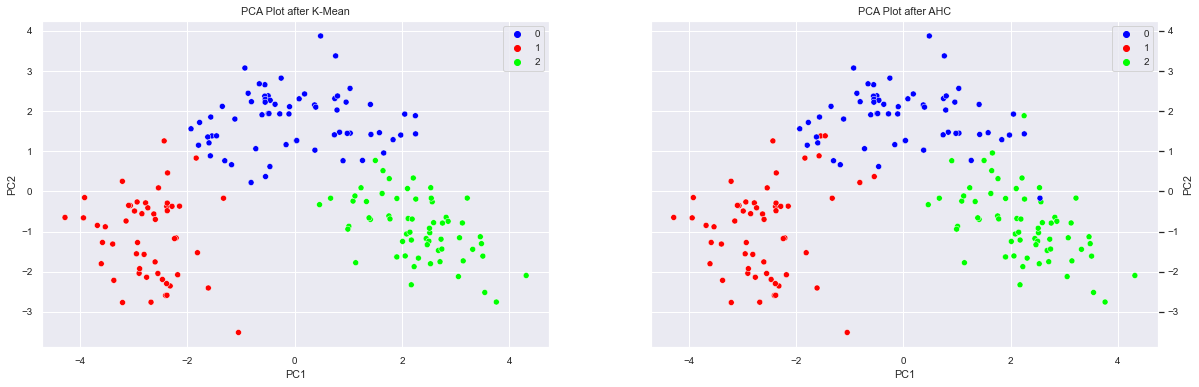

In [170]:
#Comparing plots by K-means vs Agglomerate clustering 
fig,axes = plt.subplots(1,2,figsize = (20,6))
sns.scatterplot(x_pca[:, 0],x_pca[:, 1],hue =label_s,palette='brg', ax=axes[0])
sns.scatterplot(x_pca[:, 0],x_pca[:, 1],hue =y_ahc_s,palette='brg', ax=axes[1])

axes[0].set(xlabel='PC1',ylabel='PC2',title = 'PCA Plot after K-Mean')
axes[1].set(xlabel='PC1',ylabel='PC2',title = 'PCA Plot after AHC')
axes[1].yaxis.set_label_position('right')
axes[1].yaxis.tick_right()
plt.show()

Conclusion:

Both the clustering method has given the optimum cluster value as 3.
After comparing both our models we can say that the K-means clustering is giving a slightly higher performance score than the Agglomerative Hierarchical Clustering model (After PCA) at identifying Clusters.